In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set_style("whitegrid")

In [7]:
%matplotlib inline

In [8]:
from sklearn import linear_model

In [9]:
from sklearn.datasets import load_iris

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
from sklearn import metrics

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Multi-Class Classification and k Nearest Neighbors

This project uses the famous Iris dataset to learn how to perform multi-class classification with scikit-learn. A method known as one versus all (sometimes called one versus the rest) will be used to separate data into multiple classes. The process will be very similar to carrying out a logistic regression for binary classification, but it does it for each possible class. Said differently, it can be seen as a binary classification for “one class versus all of the other classes.

-------


The data will be imported to start. That will be done by creating an object named “iris” which will be set equal to load an instance of Iris.

In [14]:
iris = load_iris()

Next, the data method will be called to grab the data features.

In [15]:
X = iris.data

Below, Y will be set as the target.

In [16]:
Y = iris.target

Next, a description of the Iris Plants Database will be printed to see what the contents of the dataset are.

In [18]:
---print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

---------


Below, the data will be put into a Pandas DataFrame. That will be done by first setting an object for the DataFrame called “irisData”. Then the DataFrame method will be called with X (features) along with the labelled columns that were shown in the Iris description. 


In [19]:
irisData = DataFrame(X, columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

A DataFrame will be made for the target below. To do that, irisTarget will be set as the DataFrame name and the DataFrame method will be used with Y (the target) and the target column name, “Species”.

In [20]:
irisTarget = DataFrame(Y, columns = ["Species"])

The species’ in the dataset are not listed by name, they are broken up by number (0 for Setosa, 1 for Versicolour, and 2 for Virginica). Next, they will be renamed so that they have actual names instead of numeric category values. 

In [21]:
def flower(num):
    if num == 0:
        return "Setosa"
    elif num == 1:
        return "Versicolour"
    else:
        return "Virginica"

Next, the flower function will be applied onto the “Species” column in “irisTarget”. And the column will be set in order to make that change permanent.  


In [22]:
irisTarget["Species"] = irisTarget["Species"].apply(flower)

In [50]:
irisTarget.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [23]:
irisTarget.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


Below, the DataFrames will be concatenated so that visualizations can be formed from the data. They will be joined along their columns, so axis 1 will be used to indicate that. 

In [24]:
iris = pd.concat([irisData, irisTarget], axis = 1)

In [25]:
iris[0:1]  # Checking the concatenation

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa


Having formatted the data into a Pandas DataFrame has made it possible to use Seaborn to quickly analyze the data visually/see how all three species relate to one another. Next, the data will be plotted.

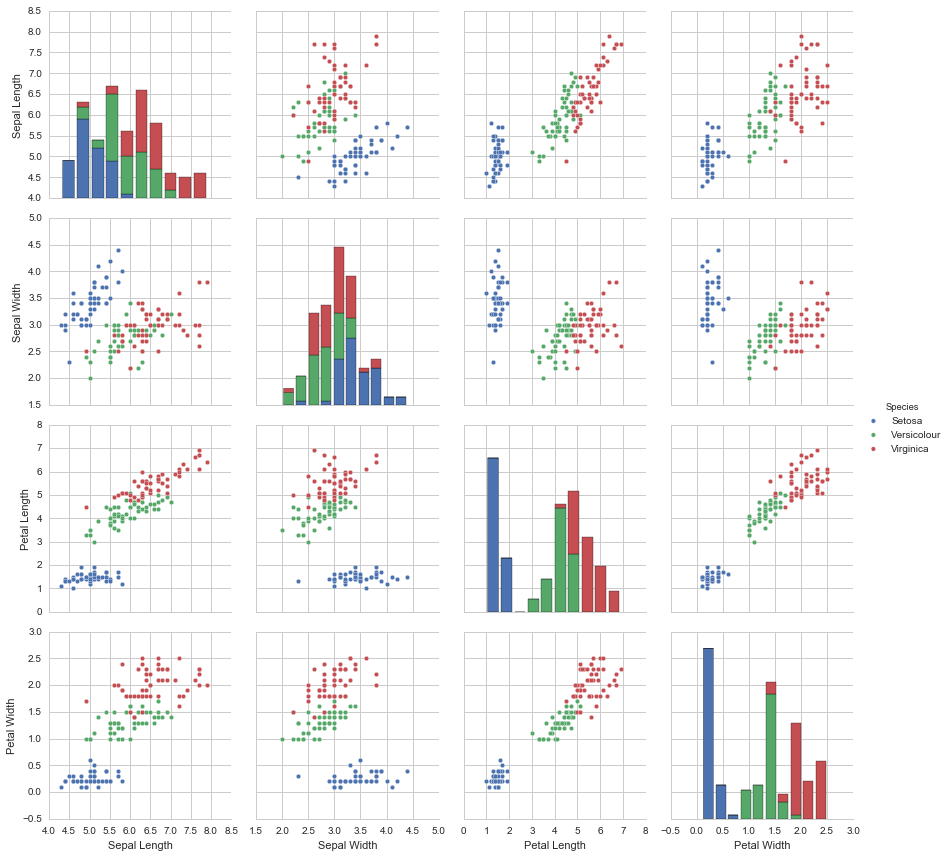

In [26]:
sns.pairplot(iris, hue = "Species", size = 3)

Setosa seems to be quite distinct from the other two species. So it seems that the challenge for multi-class classification on this dataset will be separating Versicolour and Virginica.

-----

Below, a histogram will be plotted to examine petal length distributions for all the species.

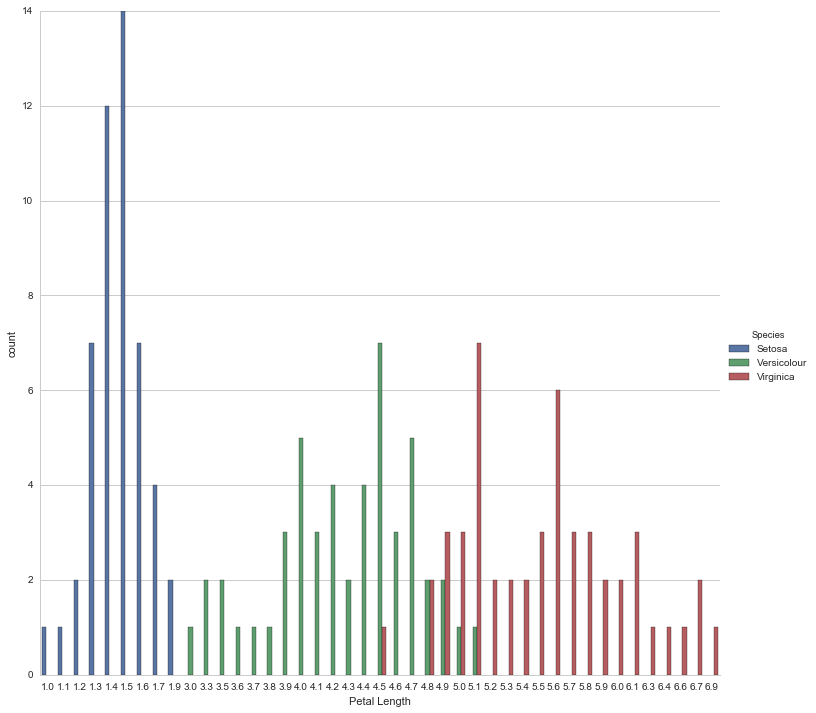

In [28]:
sns.factorplot("Petal Length", data = iris, hue = "Species", size = 10, kind = "count")

The results confirm Setosa’s distinctness and a bit of overlap between the two other species. 

In [29]:
logreg = LogisticRegression()

X and Y have been defined as features and target. Next, they will be split between testing and training sets. A test_size argument will be passed calling for the testing data to be 30% of the total data set. A random state of 3 as a seed number for the Mersenne Twister will also be passed so that the result may change every time.

In [30]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.3, random_state = 3)

Below, the training data will be fit to the model.

In [31]:
logreg.fit(XTrain, YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next, the model’s accuracy will be tested. To do that, an object called “YPred” (for prediction) will be created and it will be set to the model “logreg” (the logistic regression class object made earlier) with the prediction method applied to it and “XTest” (which holds the features in the testing set) passed through it.

In [32]:
YPred = logreg.predict(XTest)

Below, the metrics library will be called with the method accuracy passed to check the accuracy by comparing the correct set (“YTest”) to the prediction (“YPred”). 

In [34]:
print (metrics.accuracy_score(YTest, YPred))

1.0


It's hard to believe the above accuracy. A shift of the test size and/or the random state could be used to tweak things to help improve accuracy. The core, though, would be figuring out how to find a balance for results that can be trusted. More below though...

----------

Below, an object called “knn” will be made and set equal to KNeighborsClassifier() with an argument called “n_neighbors” passed through it to set k equal to 6.

In [35]:
knn = KNeighborsClassifier(n_neighbors = 6)

Next, the training data will be fit and scikit-learn will return the parameters that it assumes. 

In [36]:
knn.fit(XTrain, YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Below, a prediction will be run. The prediction will be made using the testing features data.

In [37]:
YPred = knn.predict(XTest)

Next, the metrics accuracy score that compares “YTest” to the prediction that was just made (using k Nearest Neighbors of k = 6) will be printed.

In [39]:
print (metrics.accuracy_score(YTest, YPred))

0.955555555556


In [40]:
knn = KNeighborsClassifier(n_neighbors = 1)   # Seeing how the results change when k is set equal to 1.

In [41]:
knn.fit(XTrain, YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [42]:
YPred = knn.predict(XTest)

In [44]:
print (metrics.accuracy_score(YTest, YPred))

0.955555555556



----------

In one instance, the accuracy rating was 100% and in others it was 96% (for k value 6 and k value 1). This shows that it can be hard to know what the best/most trustworthy k value to use is. 

Since the dataset is quite small (it only has 150 data points), a good way to figure out what a good k value would be would be to iterate through multiple k values in order to find the optimal k value. Below, a for loop will be created to do that for creating a new model.

In [45]:
kRange = range(1, 21)

accuracy = []

for k in kRange:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(XTrain, YTrain)
    YPred = knn.predict(XTest)
    
    accuracy.append(metrics.accuracy_score(YTest, YPred))

The results of that iterated model will be plotted to analyze the results visually below.

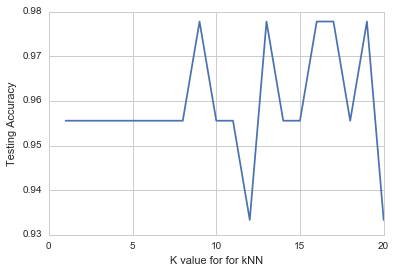

In [49]:
plt.plot(kRange, accuracy)
plt.xlabel("K value for for kNN")
plt.ylabel("Testing Accuracy")